## Library Import


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
Data = pd.read_csv('apartments.csv', sep=';', encoding='latin-1')

In [6]:

sns.set(style='whitegrid',context='notebook')
Data.columns

Index(['id', 'category', 'title', 'body', 'amenities', 'bathrooms', 'bedrooms',
       'currency', 'fee', 'has_photo', 'pets_allowed', 'price',
       'price_display', 'price_type', 'square_feet', 'address', 'cityname',
       'state', 'latitude', 'longitude', 'source', 'time'],
      dtype='object')

## Types of data

In [7]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             10000 non-null  int64  
 1   category       10000 non-null  object 
 2   title          10000 non-null  object 
 3   body           10000 non-null  object 
 4   amenities      6451 non-null   object 
 5   bathrooms      9966 non-null   float64
 6   bedrooms       9993 non-null   float64
 7   currency       10000 non-null  object 
 8   fee            10000 non-null  object 
 9   has_photo      10000 non-null  object 
 10  pets_allowed   5837 non-null   object 
 11  price          10000 non-null  int64  
 12  price_display  10000 non-null  object 
 13  price_type     10000 non-null  object 
 14  square_feet    10000 non-null  int64  
 15  address        6673 non-null   object 
 16  cityname       9923 non-null   object 
 17  state          9923 non-null   object 
 18  latitud

In [8]:
Data['amenities'].value_counts()

amenities
Parking                                                                                                                     229
Dishwasher,Refrigerator                                                                                                     225
Pool                                                                                                                        171
Dishwasher,Parking,Pool                                                                                                     149
Dishwasher                                                                                                                  147
                                                                                                                           ... 
Cable or Satellite,Dishwasher,Fireplace,Parking,Refrigerator                                                                  1
Dishwasher,Garbage Disposal,Patio/Deck,Playground,Pool,Refrigerator                           

In [9]:
Data['amenities']=Data['amenities'].replace(np.nan,'Nothing')

In [10]:
Data['bathrooms']=Data['bathrooms'].fillna(0)

In [11]:
Data['bedrooms']=Data['bedrooms'].fillna(0)

In [12]:
Data['fee'].value_counts()

fee
No    10000
Name: count, dtype: int64

In [13]:
Data['currency'].value_counts()

currency
USD    10000
Name: count, dtype: int64

In [14]:
Data=Data.drop(columns='fee')

In [15]:
Data=Data.drop(columns='currency')

In [16]:
Data['has_photo'].value_counts()

has_photo
Thumbnail    8907
Yes           909
No            184
Name: count, dtype: int64

In [17]:
Data['pets_allowed'].value_counts()


pets_allowed
Cats,Dogs    5228
Cats          485
Dogs          124
Name: count, dtype: int64

In [18]:
Data['pets_allowed']=Data['pets_allowed'].fillna('No')

In [19]:
Data['pets_allowed'].value_counts()

pets_allowed
Cats,Dogs    5228
No           4163
Cats          485
Dogs          124
Name: count, dtype: int64

Text(0.5, 1.0, 'Price Distribution')

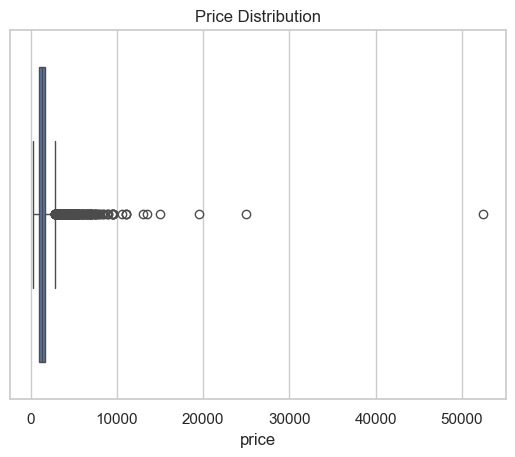

In [20]:
sns.boxplot(x=Data['price'])
plt.title('Price Distribution')

In [21]:
Data['price_display'].value_counts()

price_display
$1,350    86
$1,250    81
$850      79
$1,100    77
$1,400    74
          ..
$2,590     1
$2,370     1
$5,765     1
$6,850     1
$8,500     1
Name: count, Length: 1726, dtype: int64

In [22]:
Data_Clean=Data.copy()

In [23]:
Data_Clean=Data_Clean.drop(columns='price_display')

In [24]:
Data_Clean['price_type'].value_counts()

price_type
Monthly           9998
Weekly               1
Monthly|Weekly       1
Name: count, dtype: int64

In [25]:
Data_Clean = Data_Clean.drop(Data_Clean[Data_Clean['price_type'] == 'Weekly'].index)


In [26]:
Data_Clean = Data_Clean.drop(Data_Clean[Data_Clean['price_type'] == 'Monthly|Weekly'].index)


In [27]:
Data_Clean=Data_Clean.drop(columns='price_type')

In [28]:
Data_Clean['address'].value_counts()

address
901 Hidden Valley Drive      3
908 8th SW St                3
500 Sleepy Hollow Rd         3
7319 N Loop 1604 E           2
110 Central Avenue           2
                            ..
18605 Ave                    1
2536 W Canyon Ridge Road     1
5407 Abbott Place  Abbott    1
256 Las Entradas             1
9908 Bentcross Dr            1
Name: count, Length: 6658, dtype: int64

In [29]:
Data_Clean['category'].value_counts()


category
housing/rent/apartment     9994
housing/rent/home             2
housing/rent/short_term       2
Name: count, dtype: int64

In [30]:
Data_Clean['category']=Data_Clean['category'].replace('housing/rent/apartment','apartment')

In [31]:
Data_Clean['category']=Data_Clean['category'].replace('housing/rent/home','home')

In [32]:
Data_Clean['category']=Data_Clean['category'].replace('housing/rent/short_term','short_term')

In [33]:
Data_Clean['category'].value_counts()

category
apartment     9994
home             2
short_term       2
Name: count, dtype: int64

Text(0.5, 1.0, 'Square feet distribution')

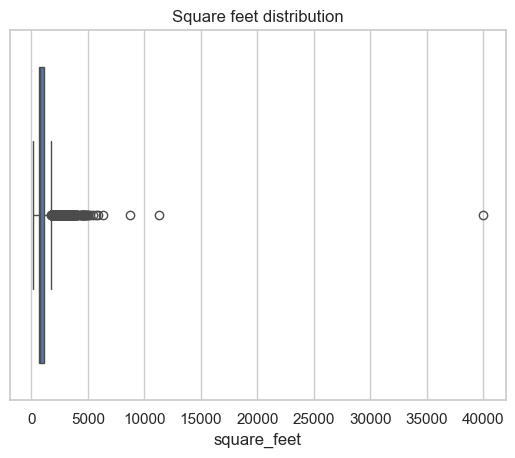

In [34]:
sns.boxplot(x=Data['square_feet'])
plt.title('Square feet distribution')

In [35]:
Data['cityname'].value_counts().size

1574

In [36]:
Data['state'].value_counts().size

51

In [37]:
Data_Clean['bathrooms']=Data_Clean['bathrooms'].astype(float).astype(int)

In [38]:
Data_Clean['bedrooms']=Data_Clean['bedrooms'].astype(float).astype(int)

In [39]:
Data_Clean['time']=pd.to_datetime(Data_Clean['time'],unit='s')

In [40]:
Data_Clean=Data_Clean.drop(columns=['title','body','address','latitude','longitude','id','time'])

In [41]:
Data_Clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9998 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   category      9998 non-null   object
 1   amenities     9998 non-null   object
 2   bathrooms     9998 non-null   int64 
 3   bedrooms      9998 non-null   int64 
 4   has_photo     9998 non-null   object
 5   pets_allowed  9998 non-null   object
 6   price         9998 non-null   int64 
 7   square_feet   9998 non-null   int64 
 8   cityname      9921 non-null   object
 9   state         9921 non-null   object
 10  source        9998 non-null   object
dtypes: int64(4), object(7)
memory usage: 937.3+ KB


In [42]:
Data_Clean.describe()

,bathrooms,bedrooms,price,square_feet
count,9998.000000,9998.000000,9998.000000,9998.000000
mean,1.342168,1.743049,1486.391278,945.949690
std,0.584591,0.943057,1076.547225,655.747081
min,0.000000,0.000000,200.000000,101.000000
25%,1.000000,1.000000,949.000000,649.000000
50%,1.000000,2.000000,1270.000000,802.500000
75%,2.000000,2.000000,1695.000000,1100.000000
max,8.000000,9.000000,52500.000000,40000.000000


In [43]:
Data_Clean.head()

,category,amenities,bathrooms,bedrooms,has_photo,pets_allowed,price,square_feet,cityname,state,source
0,apartment,Nothing,0,0,Thumbnail,No,790,101,Washington,DC,RentLingo
1,apartment,Nothing,0,1,Thumbnail,No,425,106,Evansville,IN,RentLingo
2,apartment,Nothing,1,0,Thumbnail,No,1390,107,Arlington,VA,RentLingo
3,apartment,Nothing,1,0,Thumbnail,No,925,116,Seattle,WA,RentLingo
4,apartment,Nothing,0,0,Thumbnail,No,880,125,Arlington,VA,RentLingo


## Integer Conversion

In [44]:
from sklearn.preprocessing import LabelEncoder

Col_to_enc = ['category', 'amenities', 'has_photo', 'pets_allowed', 'cityname', 'state', 'source']


for col in Col_to_enc:
    if col in Data_Clean.columns:  
        le = LabelEncoder()
        Data_Clean[col + '_encoded'] = le.fit_transform(Data_Clean[col])


In [45]:
Data_Clean_Enc=Data_Clean.select_dtypes(int,float)


In [46]:
Data_Clean_Enc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9998 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   bathrooms             9998 non-null   int64
 1   bedrooms              9998 non-null   int64
 2   price                 9998 non-null   int64
 3   square_feet           9998 non-null   int64
 4   category_encoded      9998 non-null   int64
 5   amenities_encoded     9998 non-null   int64
 6   has_photo_encoded     9998 non-null   int64
 7   pets_allowed_encoded  9998 non-null   int64
 8   cityname_encoded      9998 non-null   int64
 9   state_encoded         9998 non-null   int64
 10  source_encoded        9998 non-null   int64
dtypes: int64(11)
memory usage: 937.3 KB


In [47]:
Data_Clean_Enc.to_csv('apartments_clean.csv',index=False)